# Project Name: Advanced EDA of Retail Operations Dataset

# Stage 1: Data Loading and Overview

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Load data
products = pd.read_csv("Products.csv")
suppliers = pd.read_csv("Suppliers.csv")
inventory = pd.read_csv("Inventory.csv")
orders = pd.read_csv("Orders.csv")

# Quick overview
for df, name in zip([products, suppliers, inventory, orders],
                    ['Products', 'Suppliers', 'Inventory', 'Orders']):
    print(f"\n{name} Info:")
    print(df.info())
    print(df.describe(include='all'))



Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     5000 non-null   int64  
 1   product_name   4993 non-null   object 
 2   category       5000 non-null   object 
 3   price          5000 non-null   float64
 4   description    5000 non-null   object 
 5   reorder_level  5000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None
         product_id product_name  category        price           description  \
count   5000.000000         4993      5000  5000.000000                  5000   
unique          NaN          962         5          NaN                  5000   
top             NaN       Really  Clothing          NaN  By Republican exist.   
freq            NaN           15      1032          NaN                     1   
mean    2500.500000          NaN       NaN   253.564

# Stage 2: Data Cleaning & Preprocessing

In [2]:
# Convert date columns
orders['order_date'] = pd.to_datetime(orders['order_date'])
inventory['last_stocked'] = pd.to_datetime(inventory['last_stocked'])

# Check missing values
missing_summary = {
    'Products': products.isnull().sum(),
    'Suppliers': suppliers.isnull().sum(),
    'Inventory': inventory.isnull().sum(),
    'Orders': orders.isnull().sum()
}
print(pd.DataFrame(missing_summary))

# Drop duplicates
products.drop_duplicates(inplace=True)
suppliers.drop_duplicates(inplace=True)
inventory.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)


                   Products  Suppliers  Inventory  Orders
address                 NaN        0.0        NaN     NaN
category                0.0        NaN        NaN     NaN
city                    NaN        0.0        NaN     NaN
contact_name            NaN        0.0        NaN     NaN
country                 NaN        0.0        NaN     NaN
customer_id             NaN        NaN        NaN     0.0
description             0.0        NaN        NaN     NaN
inventory_id            NaN        NaN        0.0     NaN
last_stocked            NaN        NaN        0.0     NaN
order_date              NaN        NaN        NaN     0.0
order_id                NaN        NaN        NaN     0.0
phone                   NaN        0.0        NaN     NaN
price                   0.0        NaN        NaN     NaN
product_id              0.0        NaN        0.0     0.0
product_name            7.0        NaN        NaN     NaN
quantity_in_stock       NaN        NaN        0.0     NaN
quantity_order

# Data Merging for Unified Analysis


In [4]:
# Merge product info into orders
orders_full = orders.merge(products, on='product_id', how='left')

# Merge inventory info into orders
orders_full = orders_full.merge(inventory[['product_id', 'quantity_in_stock']], on='product_id', how='left')


# Stage 4: Feature Engineering

In [5]:
# Convert order_date and last_stocked to datetime
orders_full['order_date'] = pd.to_datetime(orders_full['order_date'])
inventory['last_stocked'] = pd.to_datetime(inventory['last_stocked'])

# Extract year, month, day, weekday from order_date
orders_full['order_year'] = orders_full['order_date'].dt.year
orders_full['order_month'] = orders_full['order_date'].dt.month
orders_full['order_day'] = orders_full['order_date'].dt.day
orders_full['order_weekday'] = orders_full['order_date'].dt.day_name()

# Total order value
orders_full['total_value'] = orders_full['price'] * orders_full['quantity_ordered']


# Stage 5: Exploratory Data Analysis (Advanced)

1. Top Selling Products

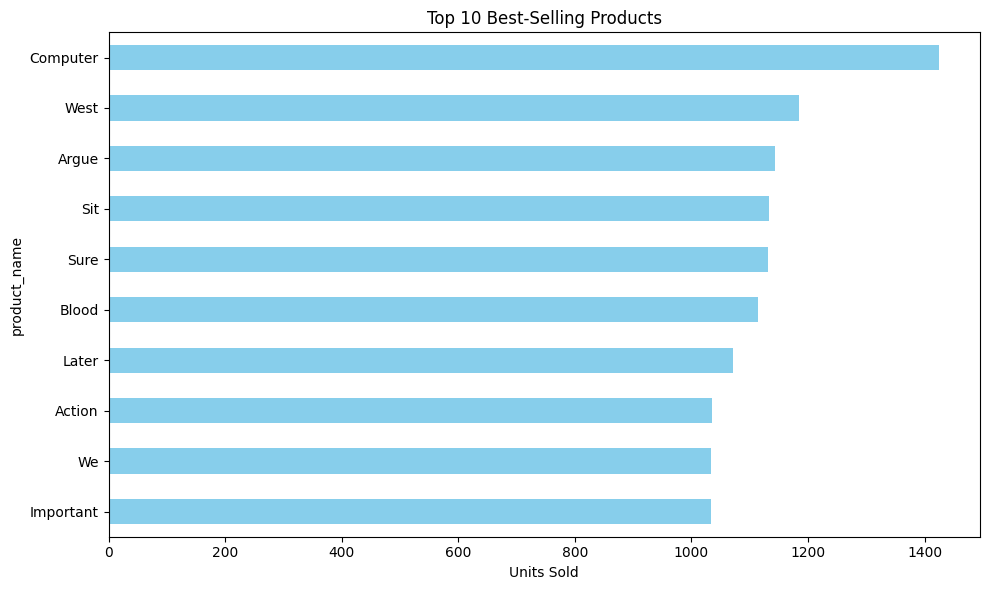

In [15]:
top_products = orders_full.groupby('product_name')['quantity_ordered'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Best-Selling Products', figsize=(10, 6), color='skyblue')
plt.xlabel('Units Sold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2. Sales Trend Over Time

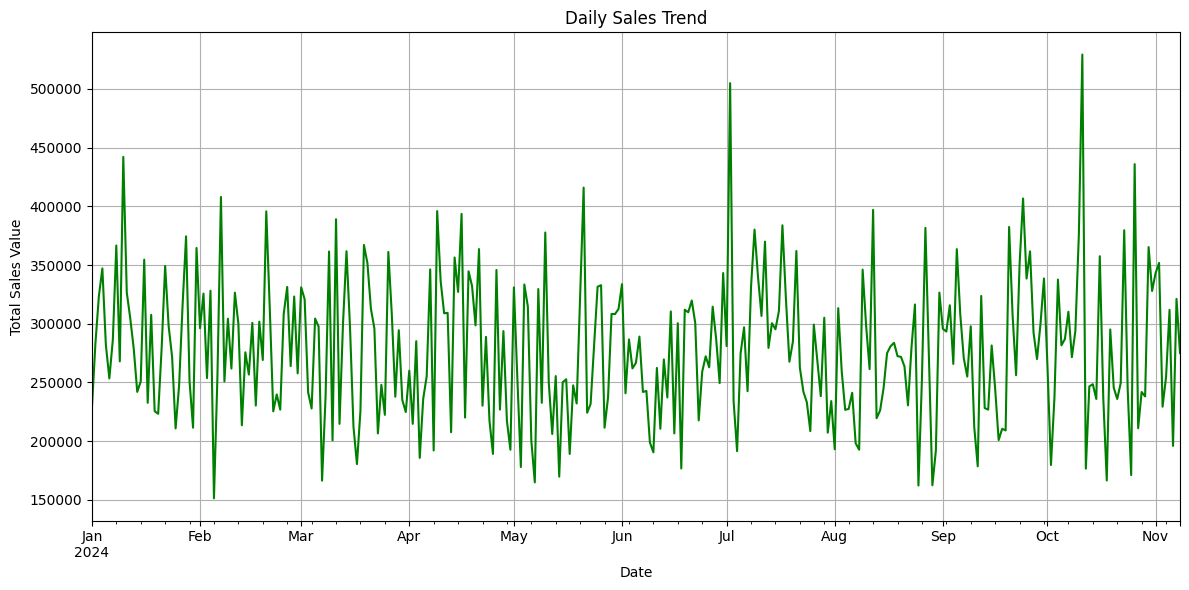

In [14]:
sales_trend = orders_full.groupby('order_date')['total_value'].sum()
sales_trend.plot(figsize=(12, 6), title='Daily Sales Trend', color='green')
plt.ylabel('Total Sales Value')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


 3. Category-Wise Revenue

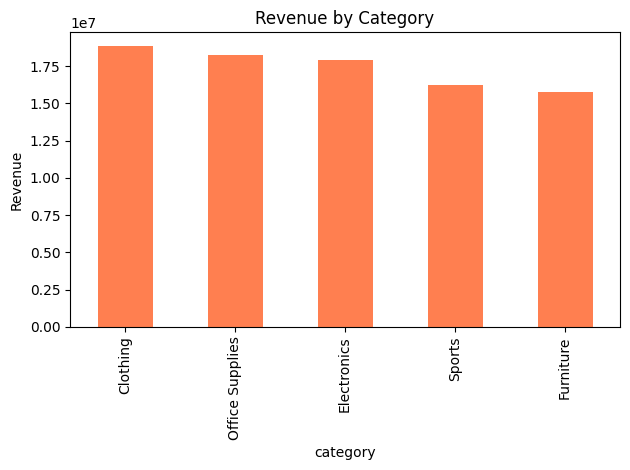

In [13]:
category_sales = orders_full.groupby('category')['total_value'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Revenue by Category', color='coral')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


 4. Inventory Status vs Reorder Level

In [9]:
# Join reorder_level from products
inventory_check = inventory.merge(products[['product_id', 'product_name', 'reorder_level']], on='product_id')
low_stock = inventory_check[inventory_check['quantity_in_stock'] < inventory_check['reorder_level']]
print("⚠️ Products that need reordering:")
display(low_stock[['product_name', 'quantity_in_stock', 'reorder_level']])


⚠️ Products that need reordering:


,product_name,quantity_in_stock,reorder_level
0,Process,12,36
3,Whom,11,20
14,Next,23,49
17,Sure,18,33
18,Agency,29,40
...,...,...,...
9965,Feel,16,50
9977,Security,1,11
9985,Group,20,50
9986,Participant,41,45


5. Order Status Distribution

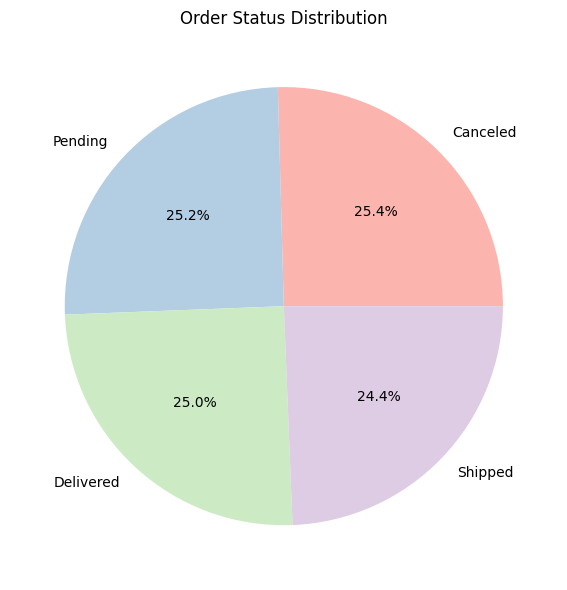

In [12]:

status_counts = orders_full['status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', title='Order Status Distribution', figsize=(6, 6), colors=plt.cm.Pastel1.colors)
plt.ylabel('')
plt.tight_layout()
plt.show()


# Stage 6: Business Questions Answered

| Business Question                                     | How You Answer It            |
| ----------------------------------------------------- | ---------------------------- |
| 🔹 Which products are most in demand?                 | `Top Selling Products`       |
| 🔹 Are we frequently understocked?                    | `Inventory vs Reorder Level` |
| 🔹 Which categories bring the most revenue?           | `Category-Wise Revenue`      |
| 🔹 When are peak sales happening?                     | `Sales Trend`                |
| 🔹 Are orders being delivered or canceled more often? | `Order Status Distribution`  |
